# Project: Investigating The TMDB movies datatest
## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction


This dataset has about 10 thousand records of movies, as well as information about:
* Movie budget
* Movie Revenue
* Cast 
* Director
* Production Company
* Rating
* Popularity
* Genre

From this extensive dataset, it would be interesting to investigate different factors and their effect on the movie's revenue, rating and popularity. As such, our exploration will try to answer the following questions:
* Does high revenue indicate the movie was good (in terms of ratings) ?
* What is the relationship between the voting average and revenues?
* Does popularity correlate with the voting verage ?
* Which genres achieve the highest revenues ?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
#plt.rcParams["figure.figsize"] = (7,7)

In [2]:
df = pd.read_csv("https://d17h27t6h515a5.cloudfront.net/topher/2017/October/59dd1c4c_tmdb-movies/tmdb-movies.csv")
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


<a id='wrangling'></a>
## Data Wrangling

In this step, we will assess data cleanliness and perform the necessary cleaning.<br>
In terms of column names, they are meaningful, and none of them have white space, which is great. <br>
However, not all of them are necessary to our analysis, so we will drop such columns.
### First, I will drop the columns that are not necessary to our analysis
These are:
* `id`
* `imdb_id`
* `homepage`
* `cast`
* `tagline`
* `overview`
* `keywords`
* `release_date`
* `production_companies`
* `budget_adj` 
* `revenue_adj`
* `runtime`

In [3]:
# I will make in place = False such that the original dataframe is intact. Any further modifications will be done
# on the copy
columns =  ["id", "imdb_id", "homepage","cast", 
            "tagline", "overview", "keywords", 
            "release_date","production_companies",
            "budget_adj", "revenue_adj", "runtime"]
df_mod = df.drop(columns = columns)
df_mod.head()

,popularity,budget,revenue,original_title,director,genres,vote_count,vote_average,release_year
0,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015
1,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,Action|Adventure|Science Fiction|Thriller,6185,7.1,2015
2,13.112507,110000000,295238201,Insurgent,Robert Schwentke,Adventure|Science Fiction|Thriller,2480,6.3,2015
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,Action|Adventure|Science Fiction|Fantasy,5292,7.5,2015
4,9.335014,190000000,1506249360,Furious 7,James Wan,Action|Crime|Thriller,2947,7.3,2015


### Second: let's remove any duplicate rows

In [4]:
# let's check if there are any
df_mod.duplicated().any()

True

In [5]:
# let's remove the duplicate rows
df_mod.drop_duplicates(inplace=True)
df_mod.duplicated().any()

False

#### Now, we will call the `info` method to see if there are null values, and check if the datatypes are correct

In [6]:
df_mod.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   popularity      10865 non-null  float64
 1   budget          10865 non-null  int64  
 2   revenue         10865 non-null  int64  
 3   original_title  10865 non-null  object 
 4   director        10821 non-null  object 
 5   genres          10842 non-null  object 
 6   vote_count      10865 non-null  int64  
 7   vote_average    10865 non-null  float64
 8   release_year    10865 non-null  int64  
dtypes: float64(2), int64(4), object(3)
memory usage: 848.8+ KB


From this, we can see that there are null values in the columns (`director, genres`). Since they are only a few null values, we can discard them


### Third: Drop the null records (since they are a few)

In [7]:
df_mod.dropna(inplace=True)
df_mod.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10800 entries, 0 to 10865
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   popularity      10800 non-null  float64
 1   budget          10800 non-null  int64  
 2   revenue         10800 non-null  int64  
 3   original_title  10800 non-null  object 
 4   director        10800 non-null  object 
 5   genres          10800 non-null  object 
 6   vote_count      10800 non-null  int64  
 7   vote_average    10800 non-null  float64
 8   release_year    10800 non-null  int64  
dtypes: float64(2), int64(4), object(3)
memory usage: 843.8+ KB


### Fourth: The Genre attribute is multivalued
The genre attribute is multivalued, since a movie can have multiple genres. This makes it difficult to aggegate about them. So, this needs to be fixed. 

We can try to one-hot encode the genres

In [8]:
# get the table representing the encoded genres
genres = df_mod.genres.str.get_dummies(sep="|")
genres.head()

,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
3,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


Now that there are many genres, I believe it's better to leave this table as it is, such that our `df_mod` dataframe doesn't get bulky. Also, not to perform unnecessary calculations when aggregating over `df_mod`. When necessary, we can join both dataframes

Now, we can drop the `genres` column

In [9]:
df_mod.drop(columns=["genres"], inplace = True)

In [10]:
df_mod.columns

Index(['popularity', 'budget', 'revenue', 'original_title', 'director',
       'vote_count', 'vote_average', 'release_year'],
      dtype='object')

I will also rename the column names in the newly created `genres` dataframe, such that there are no whitespaces, and all are lower case

In [11]:
genres.rename(columns =lambda x: x.lower().strip().replace(" ","_"),inplace=True)
genres.columns

Index(['action', 'adventure', 'animation', 'comedy', 'crime', 'documentary',
       'drama', 'family', 'fantasy', 'foreign', 'history', 'horror', 'music',
       'mystery', 'romance', 'science_fiction', 'tv_movie', 'thriller', 'war',
       'western'],
      dtype='object')

#### That's pretty much it. Now we have the relevant data in a clean format, and we can proceed to data exploration and extracting insights

<a id='eda'></a>
## Exploratory Data Analysis

In this step, we will explore the data, viewing the summary statistics and creating visualization to try to answer our questions.


###  Summary statistics and Univariate Analysis

In [12]:
df_mod.drop(columns = ["release_year"]).describe()

,popularity,budget,revenue,vote_count,vote_average
count,10800.000000,1.080000e+04,1.080000e+04,10800.000000,10800.000000
mean,0.649455,1.471114e+07,4.006558e+07,218.600741,5.970880
std,1.002441,3.098677e+07,1.173193e+08,577.165055,0.933006
min,0.000188,0.000000e+00,0.000000e+00,10.000000,1.500000
25%,0.209157,0.000000e+00,0.000000e+00,17.000000,5.400000
50%,0.385471,0.000000e+00,0.000000e+00,39.000000,6.000000
75%,0.717508,1.564374e+07,2.455409e+07,147.000000,6.600000
max,32.985763,4.250000e+08,2.781506e+09,9767.000000,9.200000


We can also plot a histogram of the columns to visualize the distribution of each column

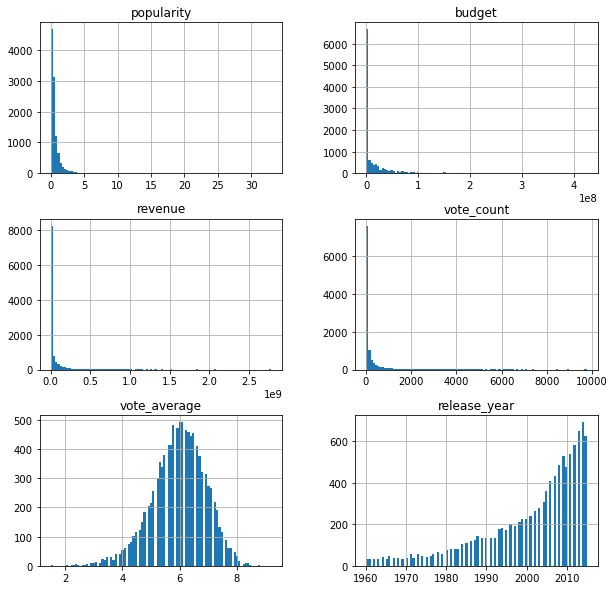

In [13]:
df_mod.hist(figsize = (10,10), bins = 100);

### From the histograms and the summary statistics, we can provide univariate analysis for the columns:

#### Voting average
It follows nearly follows normal distribution, centered at about 6. That means that in terms of rating, movies are on average OK

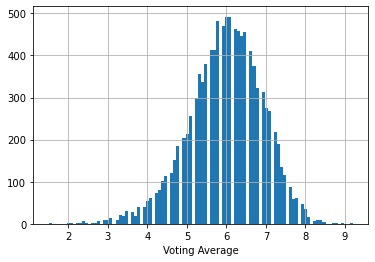

In [14]:
df_mod.vote_average.hist(bins = 100);
plt.xlabel("Voting Average");

#### Vote Count
It seems the vote count follows an exponential distribution, with the majority of counts being low, while the extremes have high vote counts. This is problematic when considering the voting average, since a low number of vote counts is not representative of the true rating.

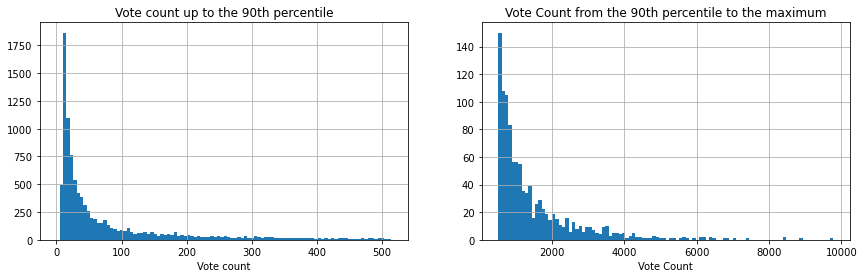

In [15]:
# I will plot the distribution over 2 plots so that the plots look nicer
# First, limit to the 90th percentile
fig = plt.subplot(1,2,1);
perc_90 = df_mod.vote_count.quantile(q = 0.9)
plt.hist(df_mod.vote_count, bins = 100, range = (0, perc_90));

plt.grid();  # grid
plt.xlabel("Vote count"); #label
plt.title("Vote count up to the 90th percentile");

# Second, plot the remaining data
plt.subplot(1,2,2);
plt.hist(df_mod.vote_count, bins = 100, range=(perc_90, df_mod.vote_count.max()));

plt.xlabel("Vote Count");
plt.title("Vote Count from the 90th percentile to the maximum");
plt.grid();

plt.subplots_adjust(right = 2);

#### Release Year
Recent movies have more records than older ones. This could be due to 
>* Unavailability of records for old movies, or 
>* because it is easier to gather data about recent movies. or
>* It could mean that movies become easier to produce as time progresses, hence more movies are produced. Or 
>* it could be a combination of such reasons

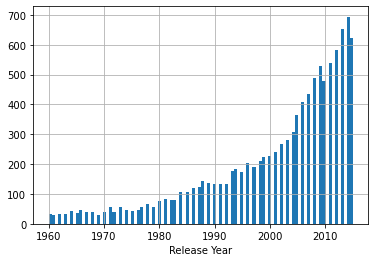

In [16]:
df_mod.release_year.hist(bins = 100);
plt.xlabel("Release Year");

#### Popularity
Popularity also seems to have an exponential distribution, with most movies being less popular, and a few being very popular. This can be intuitive since not all movies are memorable, and only a handful tend to stick in people's memories, and only a very few are extremely famous.

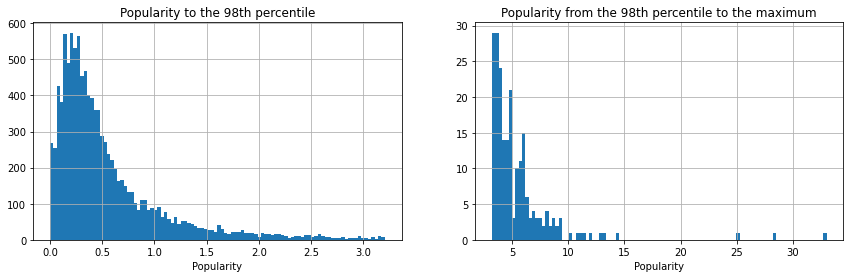

In [17]:
# First, plot upto the 90th percentile
# subplot to draw the graphs next to each other
plt.subplot(1,2,1);
perc = df_mod.popularity.quantile(q = 0.98) # the 98th percentile
plt.hist(df_mod.popularity, bins = 100, range=(0, perc)); 

plt.grid();  # grid
plt.xlabel("Popularity"); #label
plt.title("Popularity to the 98th percentile");

# Second, plot the remaining data
plt.subplot(1,2,2);
plt.hist(df_mod.popularity, bins = 100, range=(perc, df_mod.popularity.max()));

plt.xlabel("Popularity");
plt.title("Popularity from the 98th percentile to the maximum");
plt.grid();

plt.subplots_adjust(right = 2);

Let's see the 5 most popular movies

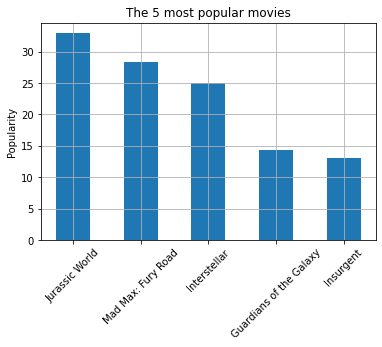

In [18]:
# find the records of the top 5 famous movies
top_5 = df_mod.sort_values(by = "popularity", ascending=False).iloc[:5] 

# use a bar plot
plt.bar(x = top_5.original_title, height=top_5.popularity, width = 0.5);

# Add and adjust labels to read them easily

plt.ylabel("Popularity");
plt.title("The 5 most popular movies");
plt.xticks(rotation = 45);
plt.grid();

Indeed, these movies are very famous globally

#### Investigating the `budget` and `revenue` columns

From the summary statistics table, we can see that the median value in the budget and revenue columns is 0! <br>
Movies can't have 0 budget. But, instead of claiming let's find an actual counterexample. <br>

I will search for a movie with great number of `vote_counts` and with 0 budget

In [19]:
# query for zero budget, and sort by vote count descendingly
df_mod[df_mod.budget < 1].sort_values(by="vote_count", ascending=False).iloc[:5]

,popularity,budget,revenue,original_title,director,vote_count,vote_average,release_year
7410,1.901256,0,80573774,Hot Fuzz,Edgar Wright,1329,7.2,2007
5450,2.195536,0,87100449,About Time,Richard Curtis,1329,7.7,2013
746,1.211609,0,0,A Million Ways to Die in the West,Seth MacFarlane,1074,5.9,2014
2419,1.945894,0,0,Tarzan,Chris Buck|Kevin Lima,912,6.9,1999
693,2.295091,0,4439431,"Love, Rosie",Christian Ditter,904,7.6,2014


So, in the first entry, it looks that the movie **Hot Fuzz** had a budget of 0! This movie starred a lot of British actors. Upon searching online, the budget of the movie is actually 8 million pounds.

Also, in the 4th entry, it looks like the movie **Tarzan** had 0 budget and gained 0 revenues! This is clearly wrong.

Accordingly, the records with 0 budget or 0 revenue could have been missing, and filled with 0 by default. For any analysis that includes budget and/or revenue, I will have to use a mask

In [20]:
# create a mask to exclude records with 0 budget
budget_mask = df_mod.budget > 1
rev_mask = df_mod.revenue > 1
money_mask = (budget_mask) & (rev_mask)
# cheking the number of records with non-zero budget and revenue
print("The number of records with non-zero budget and revenue:", money_mask.sum())

The number of records with non-zero budget and revenue: 3851


##### Now for the distribution of budget
Choosing a log scale for the x axis would be more apporpriate, since budget values can reach to hundreds of millions

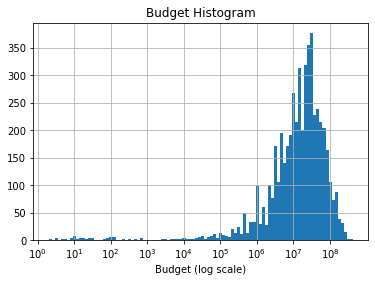

In [21]:
# get the values in log scale and applying the budget mask
budget_log = np.log10(df_mod.budget[budget_mask]);
# plot
plt.hist(x = budget_log, bins = 100);
# adjust the axis ticks
axis_ticks = np.array([0,1,2,3,4,5,6,7,8])
plt.xticks(ticks = axis_ticks, labels = ["$10^{}$".format(x) for x in axis_ticks]);
# labelling and giving a title
plt.grid();
plt.xlabel("Budget (log scale)");
plt.title("Budget Histogram");

So, it looks that the distribution of the masked budget records is on average between 10 million and a 100 million. The distribution is also left skewed

##### As for the Revenue Distribution,

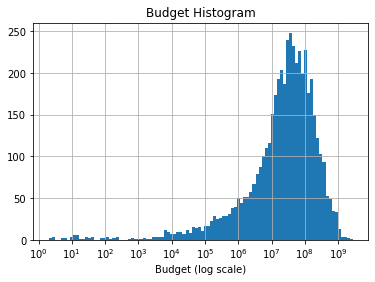

In [22]:
# get the values in log scale and applying the revenue mask
rev_log = np.log10(df_mod.revenue[rev_mask]);
# plot
plt.hist(x = rev_log, bins = 100);
# adjust the axis ticks
axis_ticks = np.array([0,1,2,3,4,5,6,7,8,9])
plt.xticks(ticks = axis_ticks, labels = ["$10^{}$".format(x) for x in axis_ticks]);
# labelling and giving a title
plt.grid();
plt.xlabel("Budget (log scale)");
plt.title("Budget Histogram");

The distribution looks similar to that of the budget, but more skewed to the left. We can see that if we plot both distributions on top of each other

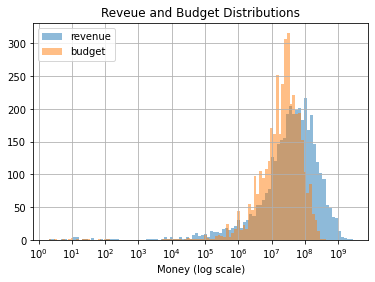

In [24]:
# get the rows where both revenue and budget are non zero in log scale
rev_log = np.log10(df_mod.revenue[money_mask])
budget_log = np.log10(df_mod.budget[money_mask])

# plotting
plt.hist(x = rev_log, bins = 100, alpha = 0.5, label = "revenue");
plt.hist(x = budget_log, bins = 100, alpha = 0.5, label = "budget");
# adjust the axis ticks
axis_ticks = np.array([0,1,2,3,4,5,6,7,8,9])
plt.xticks(ticks = axis_ticks, labels = ["$10^{}$".format(x) for x in axis_ticks]);
# labelling 
plt.grid();
plt.legend();
plt.title("Reveue and Budget Distributions");
plt.xlabel("Money (log scale)");

Obviously, the revenues need to be generally greater than the budget, otherwise, filmmaking wouldn't have been such a successful business.

##### That concludes our univariate analysis. In it we,
* Explored the attributes through summary statistics and vsiualization (along with some visualization challenges)
* We also faced some limitations, like having more data about recent movies than older ones, and also having many records that had 0 budget and 0 revenue. We went through how to handle the latter limitation, should we want to use the revenue and budget columns in any further analysis

### Research Questions:
Now, we move onward to answer our questions.

Before we do, we can get an overview of the linear corrleation by plotting the correlation heatmap. This lets us quickly visualize the linear correlation between different columns

#### Correlation Heatmap


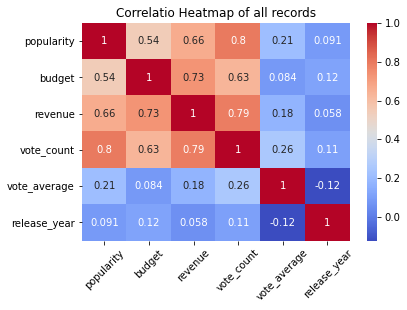

In [44]:
# The correlation heatmap for all records
correl = df_mod.corr()
sns.heatmap(data = correl,cmap = "coolwarm", annot = True);
plt.xticks(rotation = 45);
plt.title("Correlatio Heatmap of all records");

From this heatmap, we can see that:

* There is a **weak positive correlation** between popularity and the vote average! <br>
* However, we didn't take into account the influence of vote average records with small number of vote_count. We need to filter them out <br>
* Also, in order to correclty assess revenue and budget, we need to use the mask<br>
We will take care of these points

##### Acconuting for the masked records

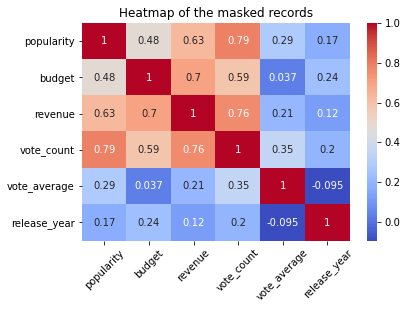

In [56]:
# The correlation heatmap for masked records
correl = df_mod[rev_mask].corr()
sns.heatmap(data = correl,cmap = "coolwarm", annot=True);
plt.xticks(rotation = 45);
plt.title("Heatmap of the masked records");

We can see that:
* The revenue has a positive correlation with the budget
* The revenue has a weaker positive correlation with the voting average
* The revenue has a positive correlation with popularity.
So, it looks like the revenue is more correlated with the popularity and budget rather than the voting average

##### Now we try filtering out low values of vote_count
We have to be careful though, as there is a tradeoff between the vote_count threshold, and the number of records that are above this threshold.
* Suppose we take 500 votes to be our threshold
* If only a 5% of the records meet this threshold, then the records used are too few
* If we make our threshold too low, like 50, and like 70% of our records meet the threshold, then some of the records will not be representative of a true voting average.
So, we want a threshold that is good enough, to represent a good percentage of the records, and take records that are representative of the voting average

I will iteratively try to find a good threshold

In [54]:
vote_count_thresh = [500,400,300,200,100, 50, 40, 30]
for count in vote_count_thresh:
    filtered = df_mod[df_mod.vote_count > count]
    print(len(filtered) / len(df_mod) * 100,"% of the data passes the", count, "votes threshold")

10.24074074074074 % of the data passes the 500 votes threshold
12.36111111111111 % of the data passes the 400 votes threshold
15.453703703703702 % of the data passes the 300 votes threshold
20.37962962962963 % of the data passes the 200 votes threshold
30.62962962962963 % of the data passes the 100 votes threshold
43.583333333333336 % of the data passes the 50 votes threshold
48.97222222222222 % of the data passes the 40 votes threshold
55.96296296296296 % of the data passes the 30 votes threshold


I think a threshold of 30 votes is good enough

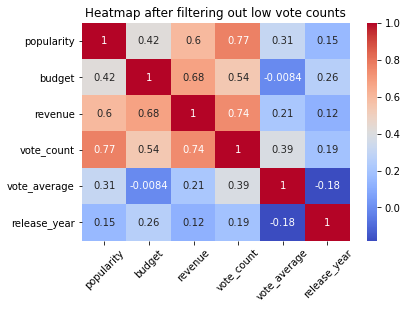

In [60]:
# The correlation heatmap for masked records and filtered vote_counts
correl = df_mod[(money_mask) & (df_mod.vote_count > 30)].corr()
sns.heatmap(data = correl,cmap = "coolwarm", annot=True);
plt.xticks(rotation = 45);
plt.title("Heatmap after filtering out low vote counts");

We can see the effect of filtering out low vote counts, the revenue has a somewhat stronger corrleation with vote average.<br>
However, there is a limitation with this method, since the vote count is coupled with the popularity, which is itself coupled with the revenue.

#### Now, let's visualize the realtionships using plots
##### Vote average Vs Popularity

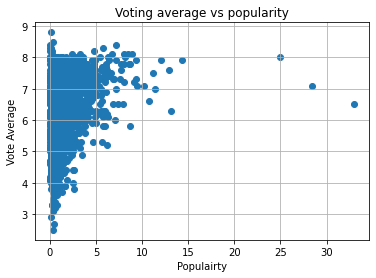

In [70]:
# filter out low votes
votes_mask = df_mod.vote_count > 30
# Scatter plot
plt.scatter(y = df_mod[votes_mask].vote_average, x = df_mod[votes_mask].popularity);
plt.ylabel("Vote Average");
plt.xlabel("Populairty");
plt.title("Voting average vs popularity");
plt.grid();

So, it seems there is indeed a positive correlation between popularity and the vote average

#####  Revenue vs Vote Average 

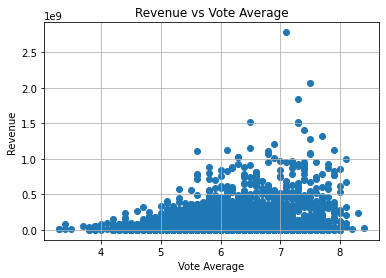

In [73]:
# Scatter plot
plt.scatter(x = df_mod[(votes_mask)& (rev_mask)].vote_average, y = df_mod[(votes_mask)&(rev_mask)].revenue);
plt.xlabel("Vote Average");
plt.ylabel("Revenue");
plt.title("Revenue vs Vote Average");
plt.grid();

So, it seems there is a positive correlation between the Revenue and the vote average

##### Revenue vs Popularity

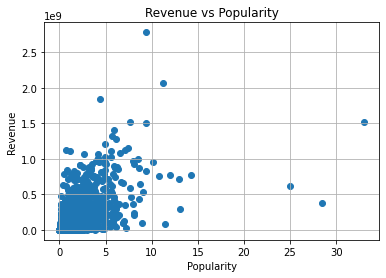

In [77]:
# Scatter plot
plt.scatter(x = df_mod[(rev_mask)].popularity, y = df_mod[(rev_mask)].revenue);
plt.xlabel("Popularity");
plt.ylabel("Revenue");
plt.title("Revenue vs Popularity");
plt.grid();

So, it looks like there is a strong correlation between popularity and revenue

##### So, our scatter plots tell us about the positive correlations between the revenue, vote average, and popularity, However, correlation does not mean causality. This analysis does not tell us what caused the other

#### Now, we move on to our last question, the genres vs revenue
For that, we will need to mask on the revenue, and join our dataframe, with the genres dataframe

In [80]:
joined = genres.join(other= df_mod[rev_mask].revenue, how = "right")
joined

,action,adventure,animation,comedy,crime,documentary,drama,family,fantasy,foreign,...,horror,music,mystery,romance,science_fiction,tv_movie,thriller,war,western,revenue
0,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,1513528810
1,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,378436354
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,295238201
3,1,1,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,2068178225
4,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1506249360
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10822,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,33736689
10828,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,13000000
10829,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,6000000
10835,1,1,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,1,0,20000000


To answer our question, we need to get the gross revenue for each genre

In [89]:
# get the columns to iterate over them
genres_cols = genres.columns
# initialize a dictionary to map each genre to its gross revenue
genre_dict = dict()
# iterate over the generes
for genre in genres_cols:
    # convert to bool to act like a mask
    genre_mask = joined[genre].astype(bool)
    # get the gross revenue
    genre_dict[genre] = joined[genre_mask].revenue.sum()

Now, we can plot a barplot showing each genre and its gross revenue

In [118]:
# sort the dictionary to make the bar plot look nicer
sorted_genre_dict = {k:v for k,v in sorted(genre_dict.items(), key=lambda item: item[1], reverse=True)}

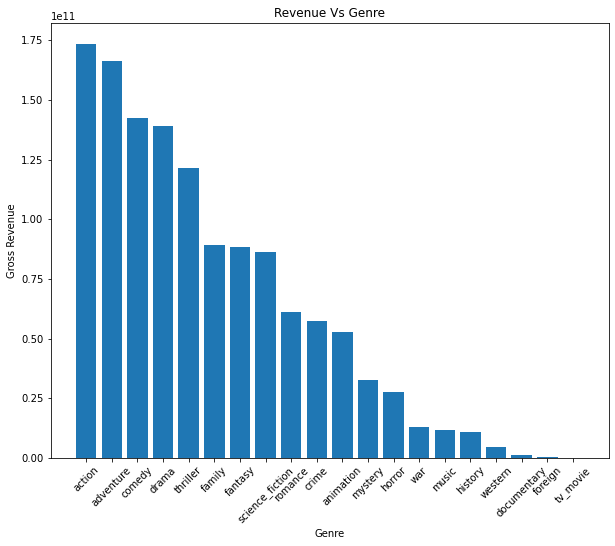

In [120]:
# plotting
plt.figure(figsize= (10,8));
plt.bar(x = sorted_genre_dict.keys(), height=sorted_genre_dict.values());
plt.xticks(rotation = 45);
plt.xlabel("Genre");
plt.ylabel("Gross Revenue");
plt.title("Revenue Vs Genre");

We can see that the `action` genre had the most revenue. <br>
However, we mustn't forget 2 facts:
* The number of valid records in terms of revenue is less than half the dataset
* We didn't account for inflation for older movies
These are the limitations of this bar plot

## Conclusion
This dataset included about 10 thousand records of movies from different genres and form different times across the 20th and 21st century. We wanted to explore the distributions of different variables, as wellas the relationship between them. Specifically the revenue, the popularity, the average voting score and the genre. <br>
One might think that the average voting is a better predictor of a movie's financial success, rather than its popularity. Another might thinnk otherwise. In such cases, it is better for all to sit down, and let the data talk through analysis. Although, we should hear what the data says, with a pinch of salt, taking care of any limitations within the analysis or the data itself.

After performing some data cleaning, and putting the data into a clear, clean format, we reached the following results:
* There is a positive correlation between the revenue and each of popularity and the average voting
* The correlation of revenue with the popularity is **significantly stronger** than that with the average voting. So a successfull movie is more likely to be popular than it having a good average rating
* The action genre is the highest grossing movie genre. (on total Not per movie)<br>
Note: The correlation doesn't mean causality. These results do not tell us which factor caused the other.

#### Limitations:
* First and formeost, all of the analysis is done on  a sample, and not on the population. So, any conclusion should be conveyed within this context
* Nearly 50% of the records had missing values in the revenue column. This adds uncertainty to our results that could have changed if the data wasn't missing
* We didn't account for inflation due to different release times of movies. That would significanlty affect the revenues especially if a movie is really old

## References
* https://stackoverflow.com/questions/613183/how-do-i-sort-a-dictionary-by-value
* https://stackoverflow.com/questions/39409866/correlation-heatmap